In [592]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np 


file_path = 'C:/Users/jalen/anaconda/July21toAugust23.csv'
df = pd.read_csv(file_path)
original_df = df.copy()

In [593]:
print(df.head())

                CDR ID            Date/Time      Type          From  \
0  (1) 1692837970.1531  2023-08-23 20:46:10  Incoming  +13175227449   
1  (2) 1692831364.1530  2023-08-23 18:56:04  Incoming  +13177520497   
2  (3) 1692831071.1529  2023-08-23 18:51:11  Incoming  +13177520497   
3  (4) 1692830966.1528  2023-08-23 18:49:26  Incoming  +13177520497   
4  (5) 1692830237.1527  2023-08-23 18:37:17  Incoming  +18009138264   

            To Destination  Duration        Trunk        CID Name  
0  13177741888         851  00:01:40  Synkato 2.0    WAGNER WENDY  
1  13177741888         851  00:00:32  Synkato 2.0   ELAINE TURNER  
2  13177741888         851  00:00:27  Synkato 2.0   ELAINE TURNER  
3  13177741888         851  00:00:30  Synkato 2.0   ELAINE TURNER  
4  13177741888         851  00:01:35  Synkato 2.0  TOLL FREE CALL  


In [594]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CDR ID       7991 non-null   object
 1   Date/Time    7991 non-null   object
 2   Type         7991 non-null   object
 3   From         7991 non-null   object
 4   To           7991 non-null   int64 
 5   Destination  7991 non-null   object
 6   Duration     7991 non-null   object
 7   Trunk        7991 non-null   object
 8   CID Name     2950 non-null   object
dtypes: int64(1), object(8)
memory usage: 562.0+ KB


In [595]:
# to numeric
df['Destination'] = pd.to_numeric(df['Destination'], errors='coerce')
original_df['Destination'] = pd.to_numeric(df['Destination'], errors='coerce')
# NaN removed
original_df = original_df.dropna(subset=['Destination'])
df = df.dropna(subset=['Destination'])

In [596]:
df.info()
original_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7872 entries, 0 to 7990
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CDR ID       7872 non-null   object 
 1   Date/Time    7872 non-null   object 
 2   Type         7872 non-null   object 
 3   From         7872 non-null   object 
 4   To           7872 non-null   int64  
 5   Destination  7872 non-null   float64
 6   Duration     7872 non-null   object 
 7   Trunk        7872 non-null   object 
 8   CID Name     2860 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 615.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7872 entries, 0 to 7990
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CDR ID       7872 non-null   object 
 1   Date/Time    7872 non-null   object 
 2   Type         7872 non-null   object 
 3   From         7872 non-null   object 
 4   To   

In [597]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

df['Duration'] = pd.to_timedelta(df['Duration'])

df = df[df['Duration'] > pd.to_timedelta('00:00:20')]

In [598]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2282 entries, 0 to 7990
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   CDR ID       2282 non-null   object         
 1   Date/Time    2282 non-null   datetime64[ns] 
 2   Type         2282 non-null   object         
 3   From         2282 non-null   object         
 4   To           2282 non-null   int64          
 5   Destination  2282 non-null   float64        
 6   Duration     2282 non-null   timedelta64[ns]
 7   Trunk        2282 non-null   object         
 8   CID Name     1509 non-null   object         
dtypes: datetime64[ns](1), float64(1), int64(1), object(5), timedelta64[ns](1)
memory usage: 178.3+ KB


In [599]:
# Employee names
extension_names = {
    220: 'Jalen',
    104: 'Izzy',
    224: 'Melissa',
    804: 'Melissa',
    115: 'Cynthia',
    105: 'Daniela',
    'Unknown': 'Unknown'
}

df['Destination'] = df['Destination'].map(extension_names)

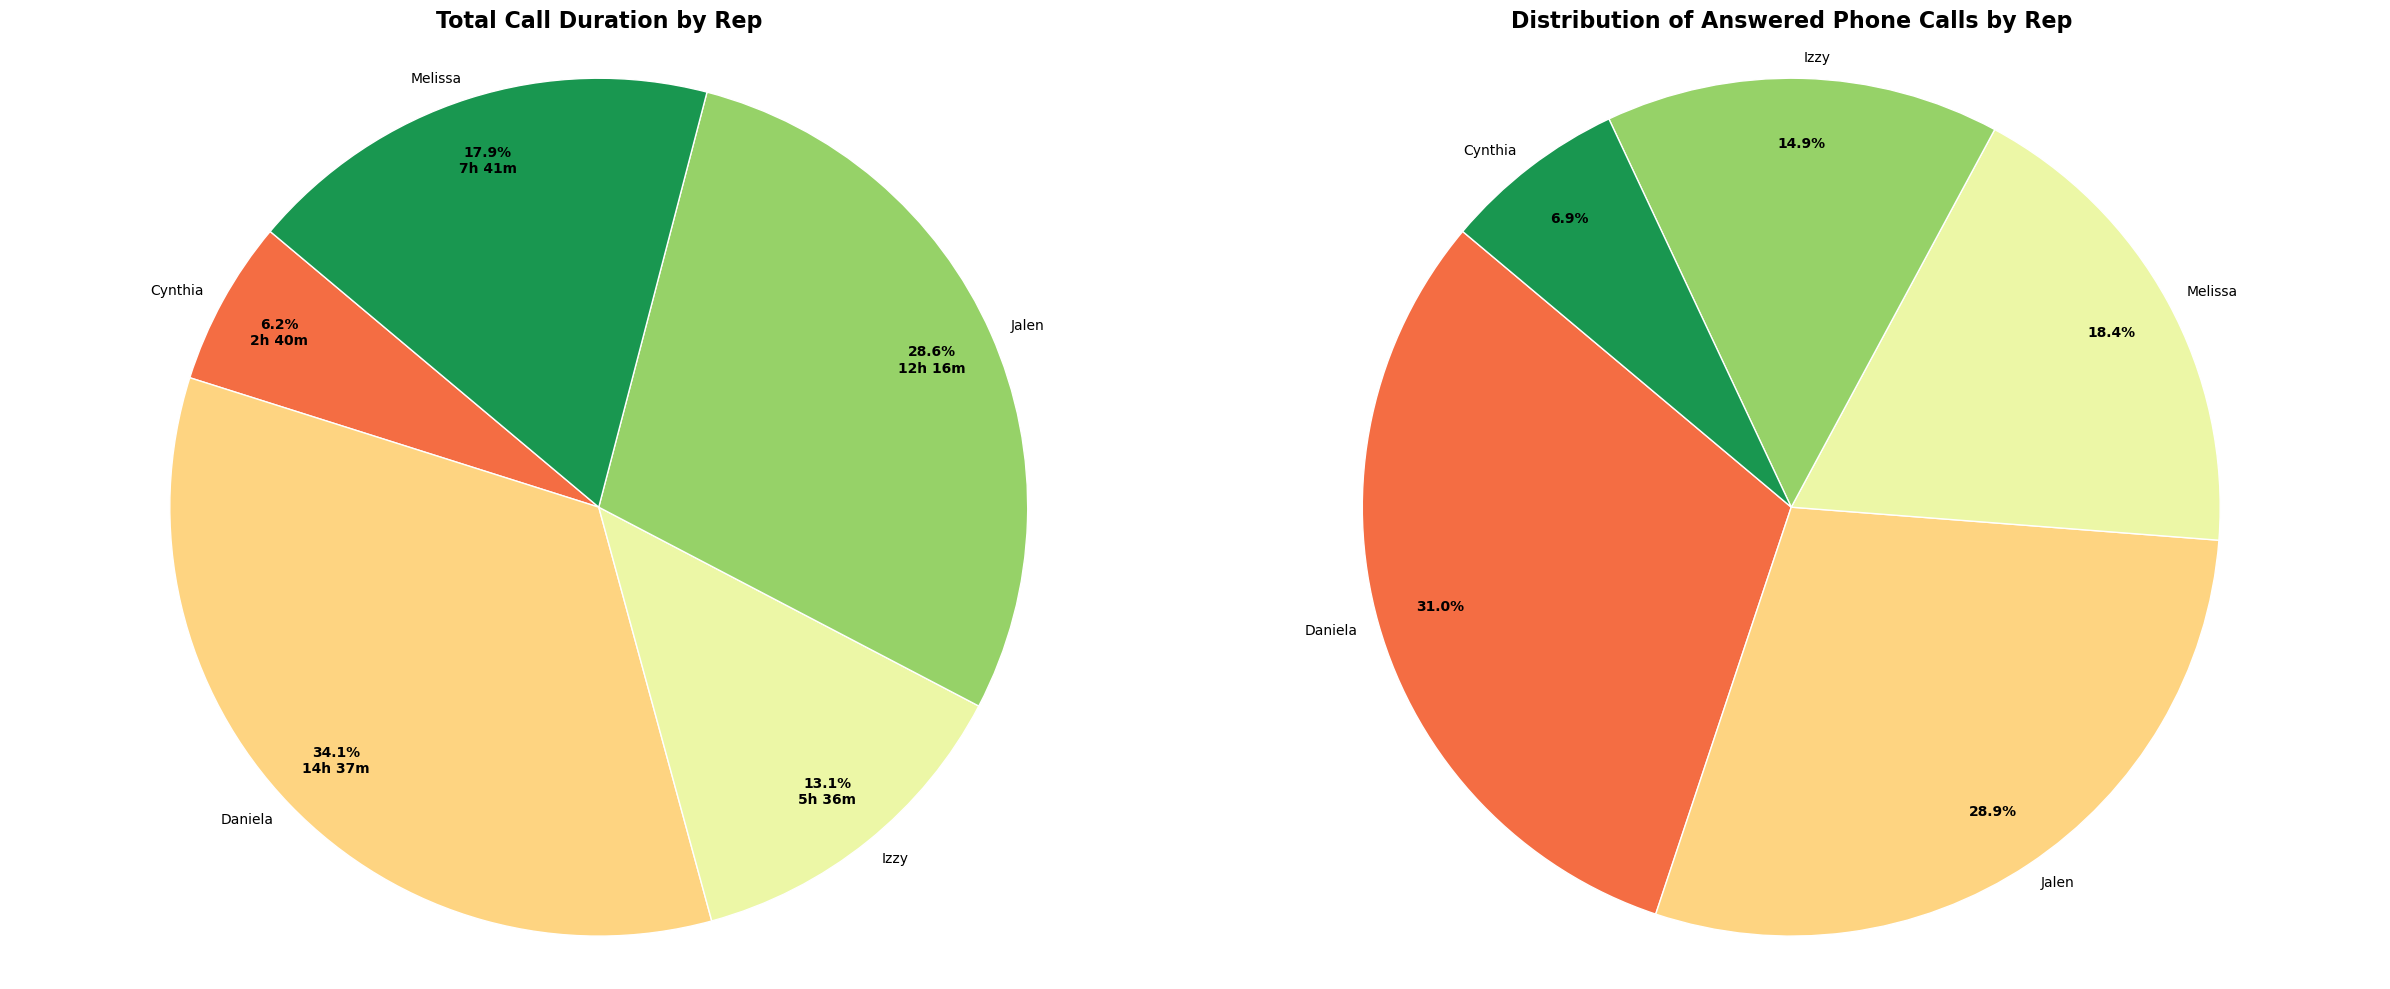

In [600]:
# Group by destination and sum the call durations as total seconds
destination_durations = df.groupby('Destination')['Duration'].sum()

df.dropna(subset=['Destination'], inplace=True)

# Calculate total call duration
total_duration = destination_durations.sum()

destination_counts = df['Destination'].value_counts()
color_palette = plt.cm.RdYlGn(np.linspace(0.2, 0.9, len(destination_durations)))

def func(pct):
    absolute_seconds = total_duration.total_seconds() * (pct / 100.0)
    total_duration_td = pd.Timedelta(seconds=absolute_seconds)
    hours = total_duration_td.seconds // 3600
    minutes = (total_duration_td.seconds % 3600) // 60
    return "{:.1f}%\n{}h {}m".format(pct, hours, minutes)

# Create subplots for both
fig, axs = plt.subplots(1, 2, figsize=(24, 10)) 

wedges, texts, autotexts = axs[0].pie(
    destination_durations,
    labels=destination_durations.index,
    autopct=func,
    startangle=140,
    pctdistance=0.85,
    labeldistance=1.05,  
    wedgeprops={'edgecolor': 'w'},
    colors=color_palette
)
axs[0].set_title('Total Call Duration by Rep', fontsize=16, fontweight='bold')
axs[0].axis('equal')
plt.setp(autotexts, size=10, weight="bold", color='black')

wedges, texts, autotexts = axs[1].pie(
    destination_counts,
    labels=destination_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    labeldistance=1.05,
    wedgeprops={'edgecolor': 'w'},
    colors=color_palette
)

axs[1].set_title('Distribution of Answered Phone Calls by Rep', fontsize=16, fontweight='bold')
axs[1].axis('equal')
plt.setp(autotexts, size=10, weight="bold", color='black')  
plt.tight_layout()

plt.show()

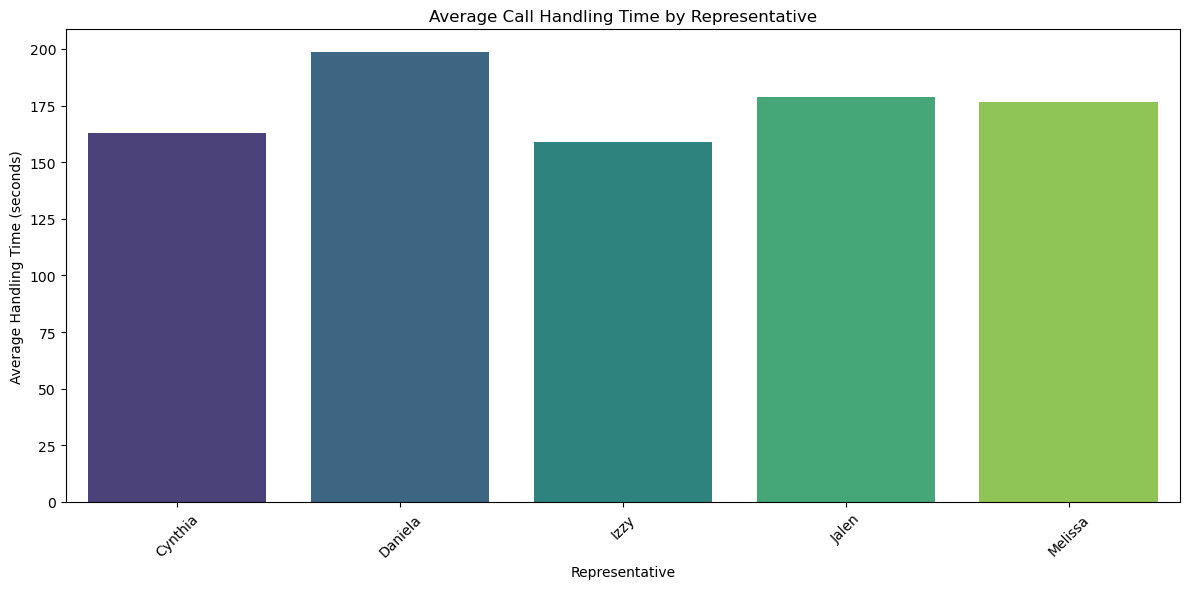

In [601]:
avg_handling_time = df.groupby('Destination')['Duration'].mean().dt.total_seconds()
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_handling_time.index, y=avg_handling_time.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Representative')
plt.ylabel('Average Handling Time (seconds)')
plt.title('Average Call Handling Time by Representative')
plt.tight_layout()
plt.show()

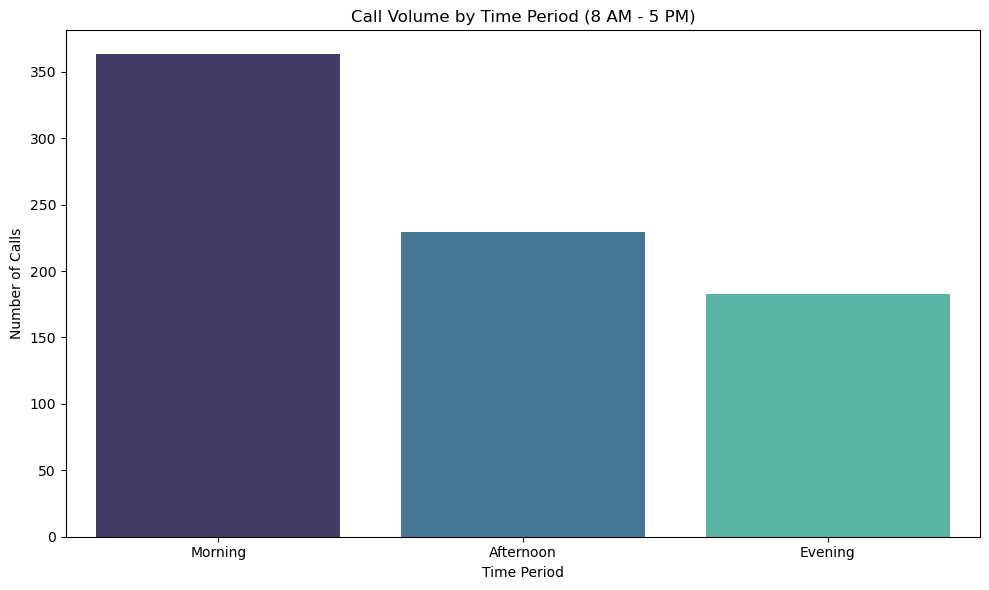

In [602]:
# Filter for 8 AM to 5 PM
df_daytime = df[(df['Date/Time'].dt.hour >= 8) & (df['Date/Time'].dt.hour <= 17)]

# new column to categorize the time periods
df_daytime['TimePeriod'] = pd.cut(df_daytime['Date/Time'].dt.hour, bins=[8, 11, 14, 17], labels=['Morning', 'Afternoon', 'Evening'])

# Plot call volume by time period
time_period_counts = df_daytime['TimePeriod'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=time_period_counts.index, y=time_period_counts.values, palette='mako')
plt.xlabel('Time Period')
plt.ylabel('Number of Calls')
plt.title('Call Volume by Time Period (8 AM - 5 PM)')
plt.tight_layout()
plt.show()

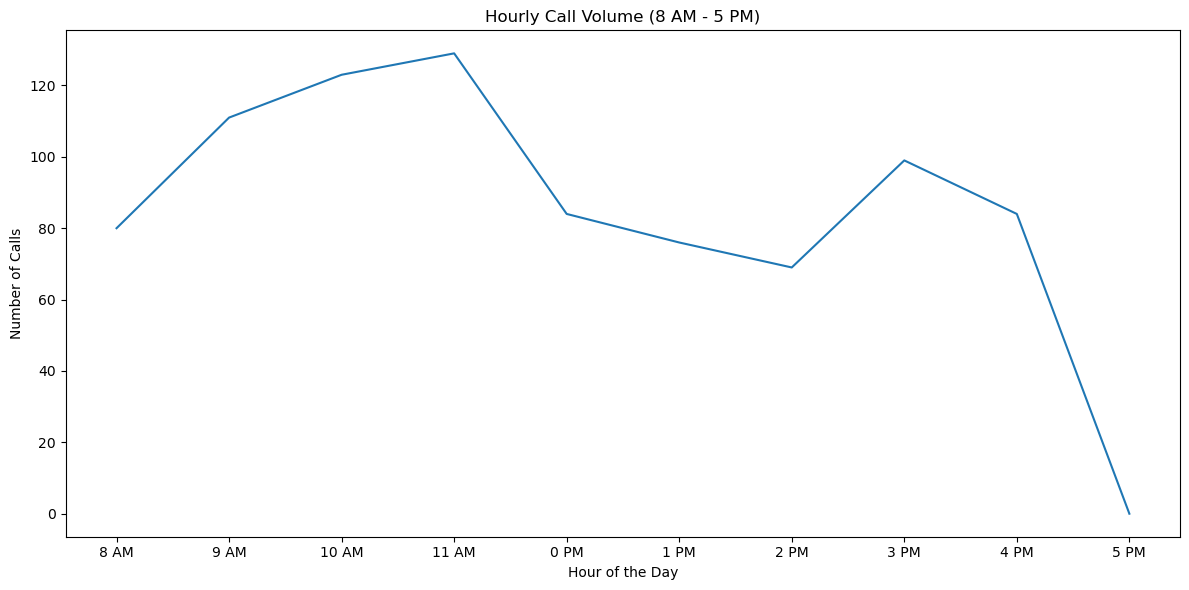

In [603]:
# Create 'Hour' column
df['Hour'] = df['Date/Time'].dt.hour

# Calculate hourly call counts
hourly_call_counts = df.groupby('Hour')['CDR ID'].count()

# time range from 8 AM to 5 PM
time_range = range(8, 18)  # 8 AM to 5 PM

# include all hrs
hourly_call_counts = hourly_call_counts.reindex(time_range, fill_value=0)

# Plot the hourly call volume
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_call_counts.index, y=hourly_call_counts.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Calls')
plt.title('Hourly Call Volume (8 AM - 5 PM)')
plt.xticks(time_range, ['{} AM'.format(hour) if hour < 12 else '{} PM'.format(hour - 12) for hour in time_range])
plt.tight_layout()
plt.show()


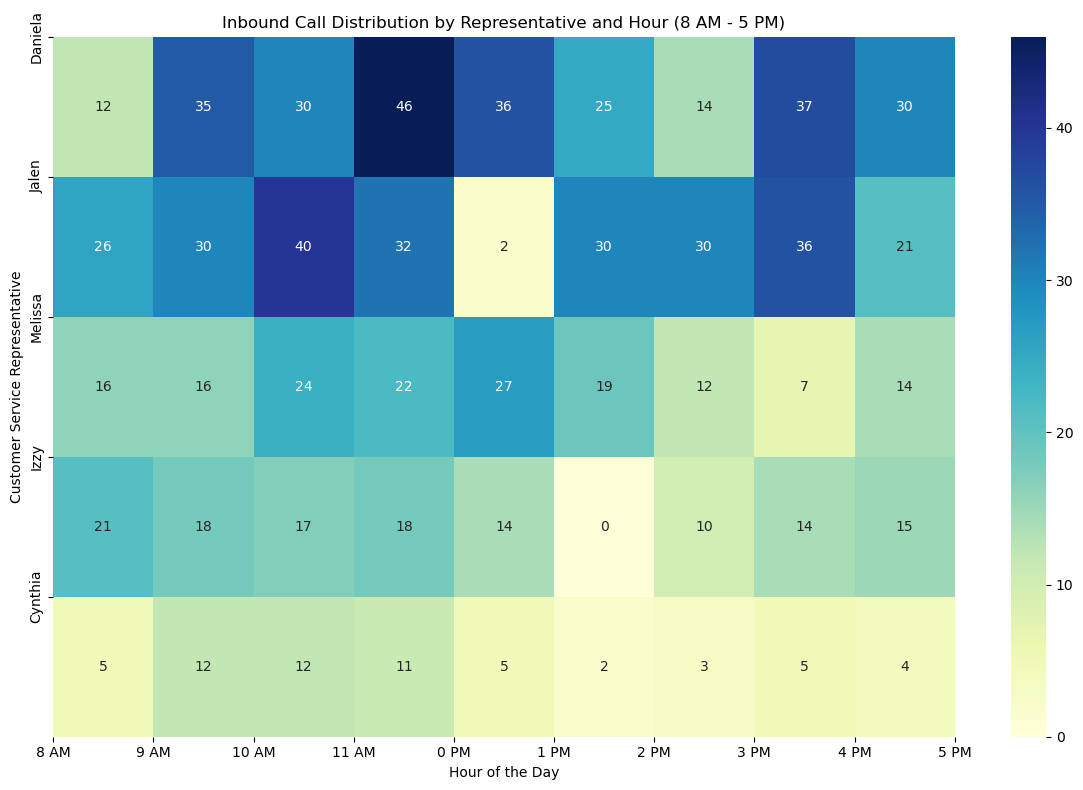

In [604]:
df_daytime = df[(df['Date/Time'].dt.hour >= 8) & (df['Date/Time'].dt.hour <= 17)]

# create a heatmap
heatmap_data = df_daytime.pivot_table(index='Destination', columns='Hour', values='CDR ID', aggfunc='count', fill_value=0)

# Sort representatives by total number of calls
sorted_representatives = heatmap_data.sum(axis=1).sort_values(ascending=False).index

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data=heatmap_data.loc[sorted_representatives], cmap='YlGnBu', annot=True, fmt='d')
plt.xlabel('Hour of the Day')
plt.ylabel('Customer Service Representative')
plt.title('Inbound Call Distribution by Representative and Hour (8 AM - 5 PM)')
plt.xticks(np.arange(10), ['{} AM'.format(hour) if hour < 12 else '{} PM'.format(hour - 12) for hour in range(8, 18)])
plt.yticks(range(len(sorted_representatives)), sorted_representatives)
plt.tight_layout()
plt.show()

In [605]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855 entries, 32 to 7989
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   CDR ID       855 non-null    object         
 1   Date/Time    855 non-null    datetime64[ns] 
 2   Type         855 non-null    object         
 3   From         855 non-null    object         
 4   To           855 non-null    int64          
 5   Destination  855 non-null    object         
 6   Duration     855 non-null    timedelta64[ns]
 7   Trunk        855 non-null    object         
 8   CID Name     211 non-null    object         
 9   Hour         855 non-null    int64          
dtypes: datetime64[ns](1), int64(2), object(6), timedelta64[ns](1)
memory usage: 73.5+ KB


In [606]:
unique_destinations = df['Destination'].unique()
print("Unique Destination Values:", unique_destinations)

Unique Destination Values: ['Izzy' 'Cynthia' 'Jalen' 'Daniela' 'Melissa']


In [607]:
# df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Filter rows with duration >= 20 seconds
# df = df[df['Duration'] > '00:00:20']



# Mapping of extension numbers to names
# extension_names = {
#    220: 'Jalen',
#    104: 'izzy',
#    224: 'melissa',
#    115: 'cynthia',
#    105: 'Daniela',
#    100: 'Tami',
#    'Unknown': 'Unknown'  # Handle the case of NaN values
#}

In [608]:
# df['Destination'] = df['Destination'].map(extension_names)
#
# destination_counts = df['Destination'].value_counts()
#
# plt.figure(figsize=(10, 6))
# plt.pie(destination_counts, labels=destination_counts.index, autopct='%1.1f%%', startangle=140)
# plt.axis('equal')
# plt.title('Distribution of Answered Phone Calls by Rep')
# plt.show()